In [2]:
# Manipulação de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Configurações visuais
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

**#Carregamento da base**

In [3]:
df_super = pd.read_csv(
    r"C:\Users\olive\OneDrive\Documentos\Dio\Portfólio\analise-compras\data\processed\base_compras_tratada.csv"
)


**Verificação inicial da base**

In [10]:
df_super.head()


,user_id,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,product_name,aisle,department,add_to_cart_order,reordered
0,202279,2,3,5,9,8.0,33120,Organic Egg Whites,eggs,dairy eggs,1,1
1,202279,2,3,5,9,8.0,28985,Michigan Organic Kale,fresh vegetables,produce,2,1
2,202279,2,3,5,9,8.0,9327,Garlic Powder,spices seasonings,pantry,3,0
3,202279,2,3,5,9,8.0,45918,Coconut Butter,oils vinegars,pantry,4,1
4,202279,2,3,5,9,8.0,30035,Natural Sweetener,baking ingredients,pantry,5,0


In [11]:
df_super.info()

<class 'pandas.DataFrame'>
RangeIndex: 33819106 entries, 0 to 33819105
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 int64  
 1   order_id                int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   product_name            str    
 8   aisle                   str    
 9   department              str    
 10  add_to_cart_order       int64  
 11  reordered               int64  
dtypes: float64(1), int64(8), str(3)
memory usage: 3.0 GB


In [15]:
df_super.shape

(33819106, 12)

In [12]:
print("Clientes únicos:", df_super["user_id"].nunique())
print("Pedidos únicos:", df_super["order_id"].nunique())
print("Produtos únicos:", df_super["product_id"].nunique())



Clientes únicos: 206209
Pedidos únicos: 3346083
Produtos únicos: 49685


Contar pedidos com days_since_prior_order = NaN. O número de NaN em days_since_prior_order deve ser igual ao número de clientes únicos.

⚠️ Importante: contar pedidos, não linhas de produto.

In [17]:
df_super.loc[
    df_super["days_since_prior_order"].isna(),
    "order_id"
].nunique()


206209

Como cada cliente possui exatamente um primeiro pedido, esperava-se que a quantidade de pedidos com days_since_prior_order nulo fosse igual ao número de clientes únicos. Essa validação foi realizada considerando pedidos únicos, uma vez que a base está no nível produto–pedido.

**Análise descritiva** 

In [ ]:
df_super["days_since_prior_order"].describe().round(2)


count    31741038.00
mean           11.36
std             8.94
min             0.00
25%             5.00
50%             8.00
75%            15.00
max            30.00
Name: days_since_prior_order, dtype: float64

In [5]:
# 1. Calculando a moda (retorna uma série)
moda_serie = df_super["days_since_prior_order"].mode()

# 2. Pegando apenas o primeiro valor da moda (caso haja empate)
moda_valor = moda_serie[0]

print(f"A moda dos dias desde o pedido anterior é: {moda_valor}")

A moda dos dias desde o pedido anterior é: 7.0


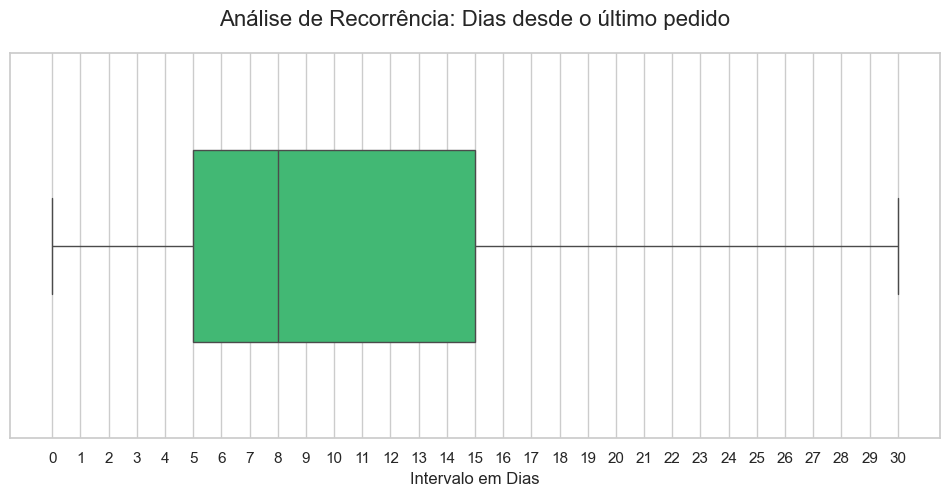

In [ ]:

plt.figure(figsize=(12, 5))

# Criando o Boxplot
sns.boxplot(x=df_super["days_since_prior_order"], 
            color="#2ecc71", 
            width=0.5,
            flierprops={"marker": "x", "markerfacecolor": "red", "markeredgecolor": "red"})

# Estilização
plt.title("Análise de Recorrência: Dias desde o último pedido", fontsize=16, pad=20)
plt.xlabel("Intervalo em Dias", fontsize=12)
plt.xticks(range(0, 31, 1)) # Mostra todos os dias de 0 a 30 no eixo X

plt.show()

C:\Users\olive\AppData\Local\Temp\ipykernel_15284\2015816488.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contagens.index, y=contagens.values, palette=cores)


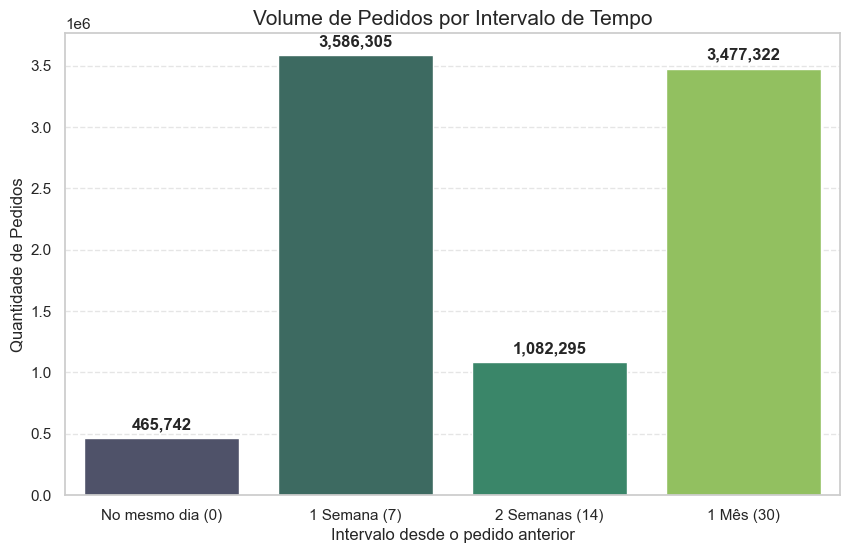

In [ ]:


# 1. Definindo os dias de interesse e filtrando a contagem
dias_alvo = [0, 7, 14, 30]
# Pegamos a contagem de cada dia e filtramos apenas os nossos alvos
contagens = df_super["days_since_prior_order"].value_counts().loc[dias_alvo]

# 2. Criando o gráfico
plt.figure(figsize=(10, 6))
# Definindo cores diferentes para cada categoria para facilitar a distinção
cores = ["#4B4E6D", "#357266", "#2D936C", "#92D050"]
sns.barplot(x=contagens.index, y=contagens.values, palette=cores)

# 3. Adicionando os números exatos sobre as barras para precisão
for i, v in enumerate(contagens.values):
    plt.text(i, v + 50000, f'{v:,}', ha='center', va='bottom', fontweight='bold')

# 4. Customizando os eixos e títulos
plt.title("Volume de Pedidos por Intervalo de Tempo", fontsize=15)
plt.ylabel("Quantidade de Pedidos")
plt.xlabel("Intervalo desde o pedido anterior")
plt.xticks([0, 1, 2, 3], ['No mesmo dia (0)', '1 Semana (7)', '2 Semanas (14)', '1 Mês (30)'])
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

**Frequência Completa de Recompra**

C:\Users\olive\AppData\Local\Temp\ipykernel_4248\417997870.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="days_since_prior_order", data=df_super, palette="viridis")


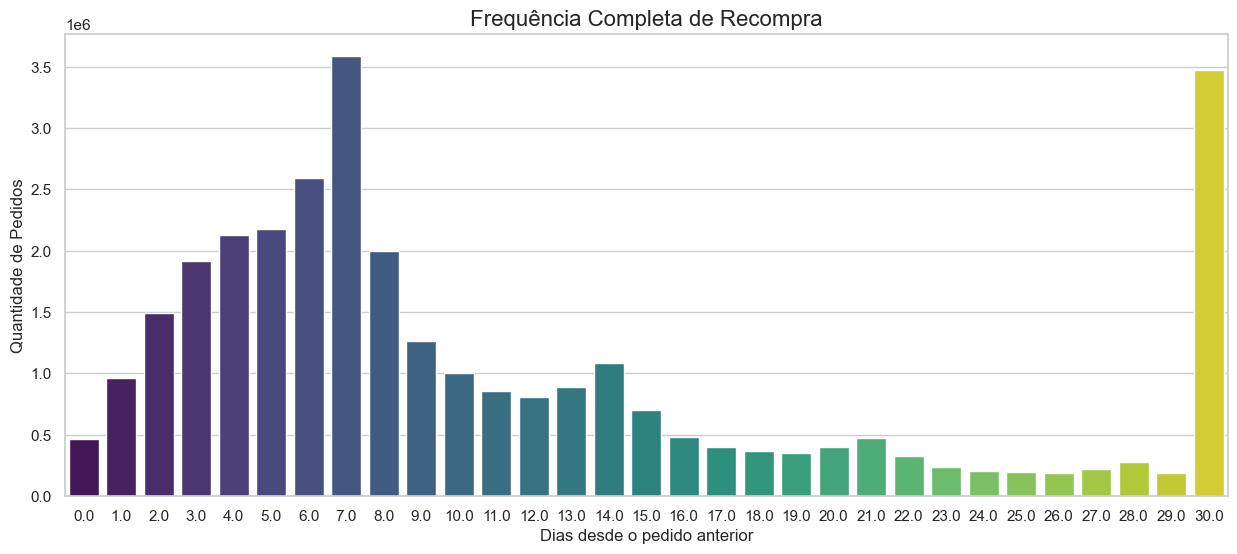

In [6]:

# 1. Configurando o tamanho e o estilo
plt.figure(figsize=(15, 6))
sns.set_style("whitegrid")

# 2. Criando o gráfico de contagem para todos os valores de 0 a 30
# Usamos o order para garantir que os dias fiquem na sequência correta
sns.countplot(x="days_since_prior_order", data=df_super, palette="viridis")

# 3. Ajustando os títulos e rótulos
plt.title("Frequência Completa de Recompra", fontsize=16)
plt.xlabel("Dias desde o pedido anterior", fontsize=12)
plt.ylabel("Quantidade de Pedidos", fontsize=12)

# Forçamos o eixo X a mostrar todos os números de 0 a 30
plt.xticks(rotation=0) 

plt.show()

In [ ]:
# 1. Calcula as porcentagens (normalize=True) e ordena pelos dias (sort_index)
porcentagens_completas = (df_super["days_since_prior_order"].value_counts(normalize=True).sort_index() * 100).round(2)

# 2. Exibe o resultado
print("Porcentagem de pedidos por intervalo de dias:")
print(porcentagens_completas)

Porcentagem de pedidos por intervalo de dias:
days_since_prior_order
0.0      1.48
1.0      3.10
2.0      4.83
3.0      6.19
4.0      6.85
5.0      7.00
6.0      8.30
7.0     11.46
8.0      6.37
9.0      4.02
10.0     3.19
11.0     2.71
12.0     2.55
13.0     2.81
14.0     3.40
15.0     2.21
16.0     1.52
17.0     1.26
18.0     1.16
19.0     1.10
20.0     1.25
21.0     1.46
22.0     1.02
23.0     0.74
24.0     0.64
25.0     0.59
26.0     0.59
27.0     0.67
28.0     0.83
29.0     0.58
30.0    10.11
Name: proportion, dtype: float64


In [ ]:
# 1. Contagem absoluta por dia da semana
contagem_dias = df_super["order_dow"].value_counts().sort_index()

# 2. Porcentagem (Peso de cada dia no total)
perc_dias = (df_super["order_dow"].value_counts(normalize=True).sort_index() * 100).round(2)

print("Pedidos por Dia (0-6):")
print(contagem_dias)
print("\nParticipação Percentual (%):")
print(perc_dias)

Pedidos por Dia (0-6):
order_dow
0    6533692
1    5871834
2    4378360
3    3998498
4    3942696
5    4386443
6    4707583
Name: count, dtype: int64

Participação Percentual (%):
order_dow
0    19.32
1    17.36
2    12.95
3    11.82
4    11.66
5    12.97
6    13.92
Name: proportion, dtype: float64


**Distribuição dos pedidos por dia da Semana**

C:\Users\olive\AppData\Local\Temp\ipykernel_11188\4258759625.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="order_dow", data=df_super, palette="coolwarm")


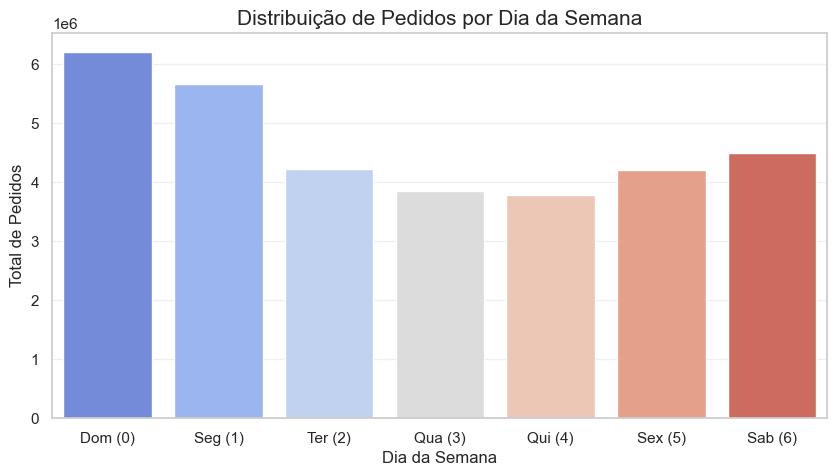

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x="order_dow", data=df_super, palette="coolwarm")

# Substituindo os números pelos nomes (Assumindo 0 como Domingo)
plt.xticks(range(7), ['Dom (0)', 'Seg (1)', 'Ter (2)', 'Qua (3)', 'Qui (4)', 'Sex (5)', 'Sab (6)'])

plt.title("Distribuição de Pedidos por Dia da Semana", fontsize=15)
plt.xlabel("Dia da Semana", fontsize=12)
plt.ylabel("Total de Pedidos")
plt.grid(axis='y', alpha=0.3)

plt.show()

**Mapa de Calor (Heatmap)  Cruzando os dados de dia e hora**

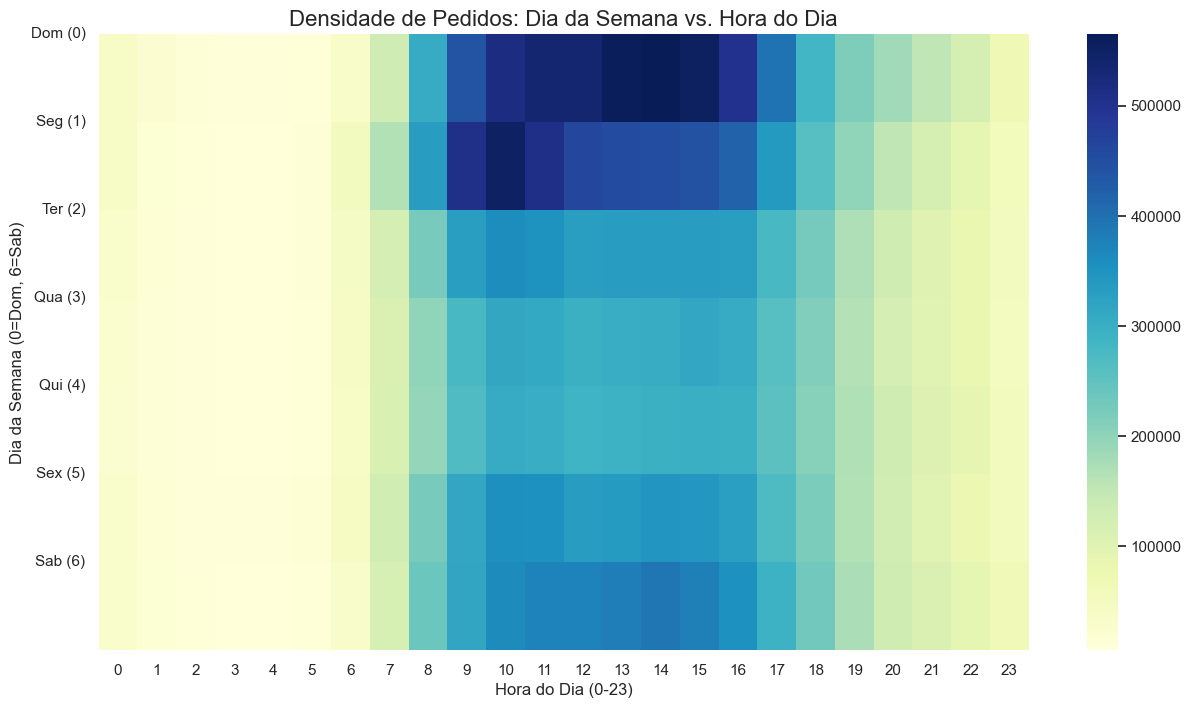

In [ ]:
# 1. Criando uma tabela de cruzamento (Pivot Table) entre dia e hora
# Contamos os pedidos para cada combinação de dia (DOW) e hora
heatmap_data = df_super.groupby(["order_dow", "order_hour_of_day"]).size().unstack()

# 2. Configurando o gráfico
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=False, fmt="d")

# 3. Ajustando os rótulos
plt.title("Densidade de Pedidos: Dia da Semana vs. Hora do Dia", fontsize=16)
plt.xlabel("Hora do Dia (0-23)", fontsize=12)
plt.ylabel("Dia da Semana (0=Dom, 6=Sab)", fontsize=12)
plt.yticks(ticks=range(7), labels=['Dom (0)', 'Seg (1)', 'Ter (2)', 'Qua (3)', 'Qui (4)', 'Sex (5)', 'Sab (6)'], rotation=0)

plt.show()

**Distribuição de Pedidos por Período do Dia**

C:\Users\olive\AppData\Local\Temp\ipykernel_23416\193909823.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencia_periodo.index, y=frequencia_periodo.values, palette='viridis')


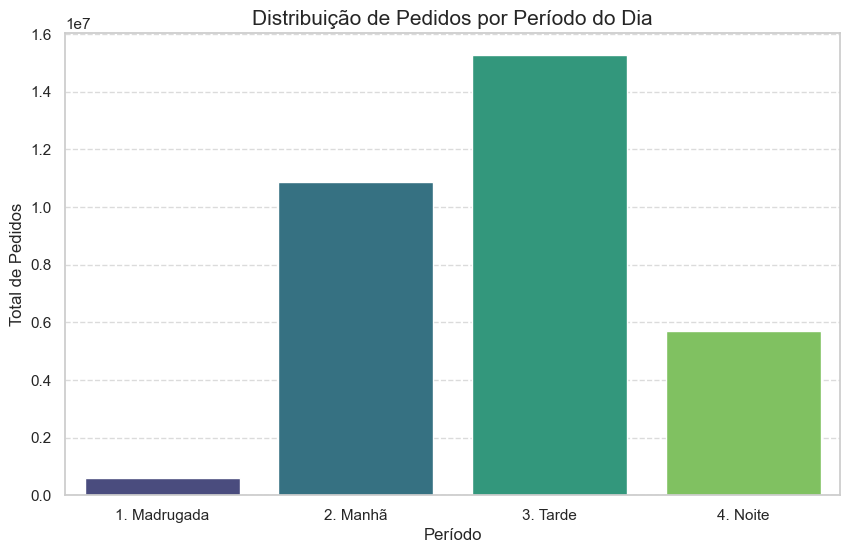

               Pedidos  Porcentagem (%)
periodo_dia                            
1. Madrugada    596834             1.84
2. Manhã      10862426            33.49
3. Tarde      15267143            47.07
4. Noite       5708086            17.60


In [ ]:
# 1. Definindo a função de agrupamento
def mapear_periodo(hora):
    if 0 <= hora < 6:
        return '1. Madrugada'
    elif 6 <= hora < 12:
        return '2. Manhã'
    elif 12 <= hora < 18:
        return '3. Tarde'
    else:
        return '4. Noite'

# 2. Criando a nova coluna no DataFrame
df_super['periodo_dia'] = df_super['order_hour_of_day'].apply(mapear_periodo)

# 3. Calculando a frequência por período
frequencia_periodo = df_super['periodo_dia'].value_counts().sort_index()

# 4. Visualização
plt.figure(figsize=(10, 6))
sns.barplot(x=frequencia_periodo.index, y=frequencia_periodo.values, palette='viridis')

plt.title('Distribuição de Pedidos por Período do Dia', fontsize=15)
plt.xlabel('Período', fontsize=12)
plt.ylabel('Total de Pedidos', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# Exibindo os valores exatos e a porcentagem
df_resumo = pd.DataFrame({
    'Pedidos': frequencia_periodo,
    'Porcentagem (%)': (frequencia_periodo / frequencia_periodo.sum() * 100).round(2)
})
print(df_resumo)

**Cálculo da Quantidade de Pedidos por Cliente**

In [13]:
# Agrupando por 'user_id' e extraindo o valor máximo de 'order_number'
# Usamos .reset_index() para transformar o resultado em um DataFrame limpo
df_total_pedidos = df_super.groupby('user_id')['order_number'].max().reset_index()

# Renomeando as colunas para melhor identificação no relatório
df_total_pedidos.columns = ['user_id', 'total_pedidos']

# Exibindo o resultado para conferência
print(df_total_pedidos.head())

   user_id  total_pedidos
0        1             11
1        2             15
2        3             12
3        4              5
4        5              5


In [14]:
# 1. Calculando as métricas de centralidade
media = df_total_pedidos['total_pedidos'].mean()
mediana = df_total_pedidos['total_pedidos'].median()
moda = df_total_pedidos['total_pedidos'].mode()[0]

# 2. Exibindo os resultados
print(f"Média de pedidos por cliente: {media:.2f}")
print(f"Mediana (50% dos clientes): {mediana}")
print(f"Moda (Frequência mais comum): {moda}")

Média de pedidos por cliente: 16.23
Mediana (50% dos clientes): 10.0
Moda (Frequência mais comum): 4


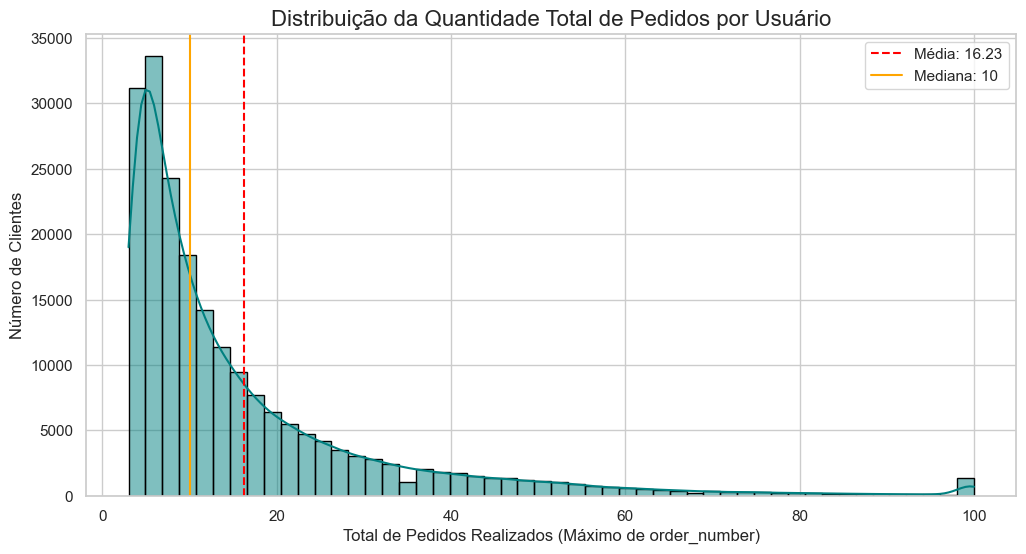

In [ ]:
# 1. Configurando o estilo e o tamanho do gráfico
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# 2. Criando o Histograma
# 'total_pedidos' é a coluna que contém o máximo de pedidos de cada usuário
sns.histplot(df_total_pedidos['total_pedidos'], bins=50, kde=True, color='teal', edgecolor='black')

# 3. Adicionando as linhas de centralidade
plt.axvline(df_total_pedidos['total_pedidos'].mean(), color='red', linestyle='--', label=f"Média: {df_total_pedidos['total_pedidos'].mean():.2f}")
plt.axvline(df_total_pedidos['total_pedidos'].median(), color='orange', linestyle='-', label=f"Mediana: {df_total_pedidos['total_pedidos'].median():.0f}")

# 4. Customização de títulos e rótulos
plt.title('Distribuição da Quantidade Total de Pedidos por Usuário', fontsize=16)
plt.xlabel('Total de Pedidos Realizados (Máximo de order_number)', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.legend()

plt.show()

**Departamentos e Corredores**

Volume de Produtos por Departamento

C:\Users\olive\AppData\Local\Temp\ipykernel_4248\3327879836.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_dept_freq, x='quantidade', y='department', palette='viridis')


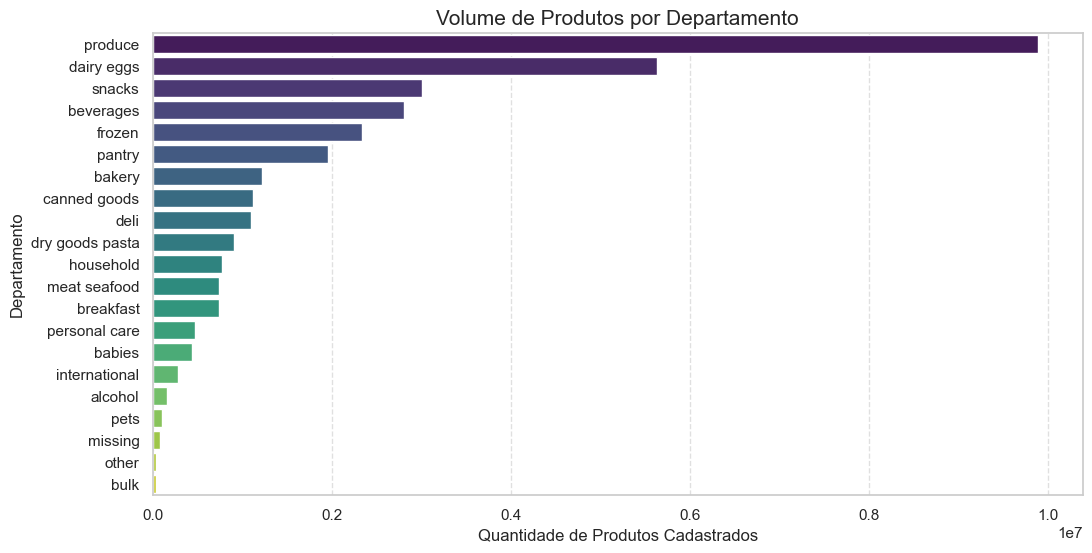

In [15]:

# Calculando a frequência dos departamentos
df_dept_freq = df_super['department'].value_counts().reset_index()
df_dept_freq.columns = ['department', 'quantidade']

# Visualização dos Departamentos
plt.figure(figsize=(12, 6))
sns.barplot(data=df_dept_freq, x='quantidade', y='department', palette='viridis')

plt.title('Volume de Produtos por Departamento', fontsize=15)
plt.xlabel('Quantidade de Produtos Cadastrados', fontsize=12)
plt.ylabel('Departamento', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

**Volume de Produtos por Corredor (Aisles)**   

Como existem muitos corredores (mais de 100), o ideal é visualizar o Top 20 para garantir que o gráfico seja legível e aponte os nichos mais importantes do catálogo.

C:\Users\olive\AppData\Local\Temp\ipykernel_18788\2372066528.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_aisles, x='quantidade', y='aisle', palette='magma')


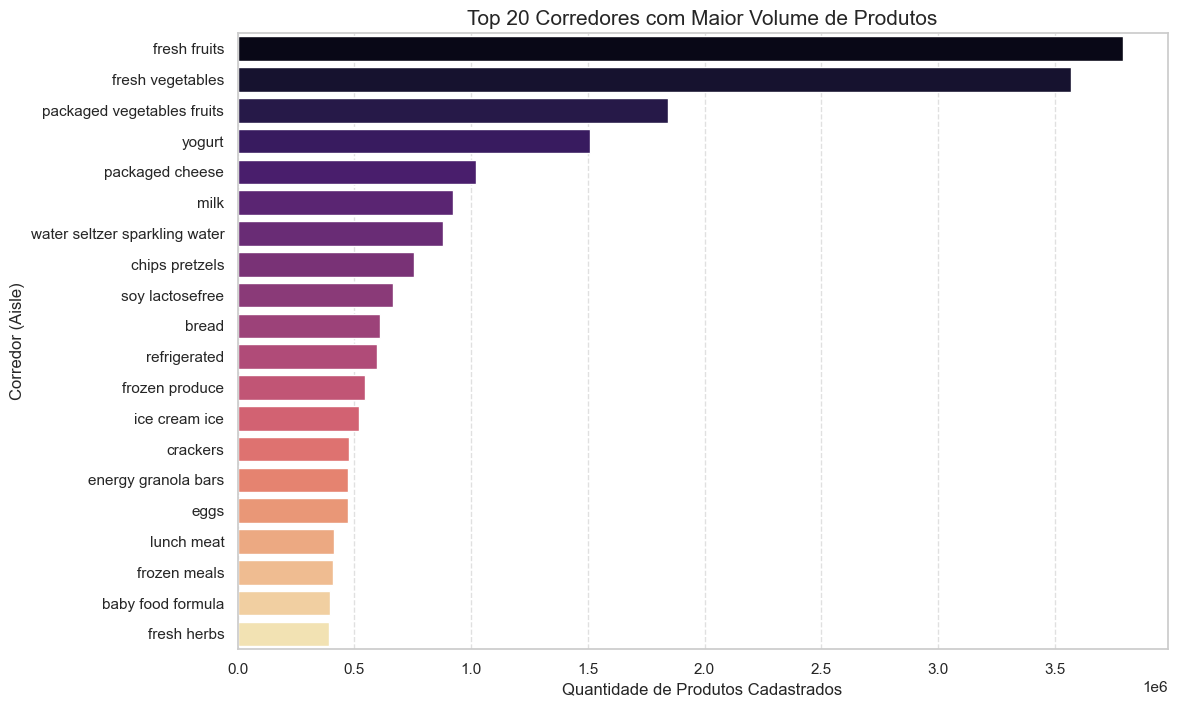

In [ ]:
# Calculando a frequência dos corredores (Top 20)
top_aisles = df_super['aisle'].value_counts().head(20).reset_index()
top_aisles.columns = ['aisle', 'quantidade']

# Visualização dos Corredores
plt.figure(figsize=(12, 8))
sns.barplot(data=top_aisles, x='quantidade', y='aisle', palette='magma')

plt.title('Top 20 Corredores com Maior Volume de Produtos', fontsize=15)
plt.xlabel('Quantidade de Produtos Cadastrados', fontsize=12)
plt.ylabel('Corredor (Aisle)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

verificando com Top 50

C:\Users\olive\AppData\Local\Temp\ipykernel_4248\2442893760.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_aisles, x='quantidade', y='aisle', palette='magma')


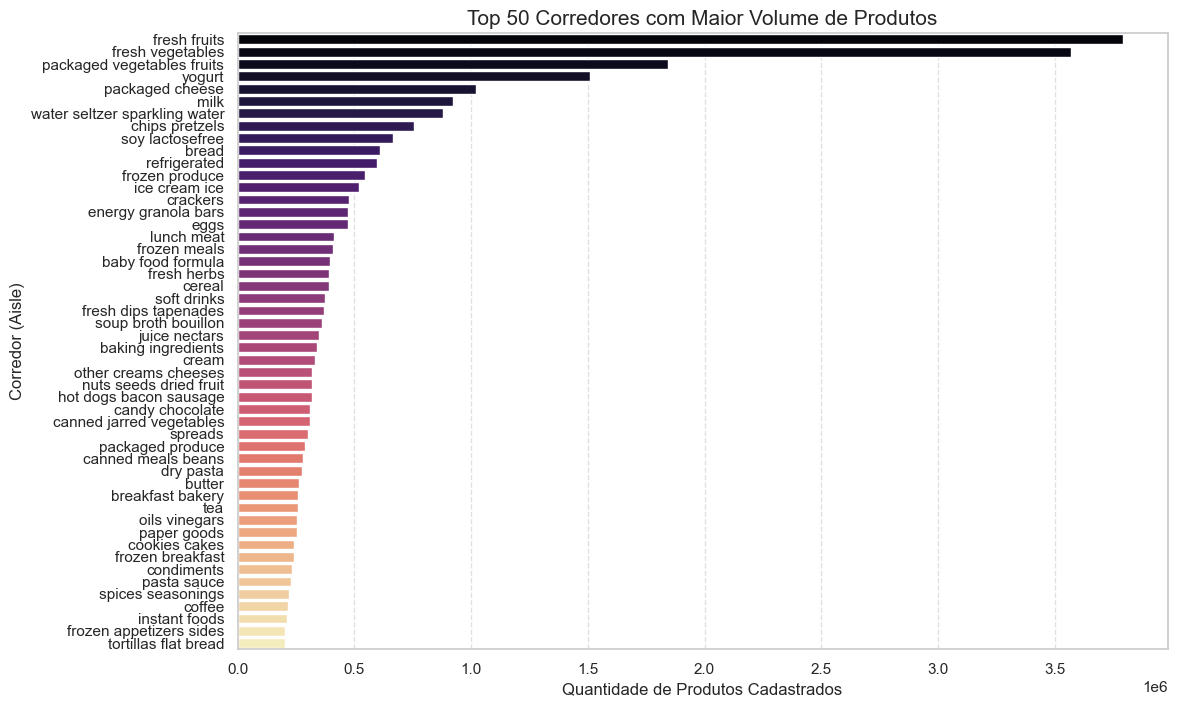

In [16]:
# Calculando a frequência dos corredores (Top 50)
top_aisles = df_super['aisle'].value_counts().head(50).reset_index()
top_aisles.columns = ['aisle', 'quantidade']

# Visualização dos Corredores
plt.figure(figsize=(12, 8))
sns.barplot(data=top_aisles, x='quantidade', y='aisle', palette='magma')

plt.title('Top 50 Corredores com Maior Volume de Produtos', fontsize=15)
plt.xlabel('Quantidade de Produtos Cadastrados', fontsize=12)
plt.ylabel('Corredor (Aisle)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

**Explorando os três departamentos com maior volume**

In [ ]:
# 1. Lista de departamentos que queremos explorar
depts_alvo = ['produce']

# 2. Filtrando o df_super para obter apenas os produtos únicos dessas categorias
# Usamos o .drop_duplicates para não repetir o mesmo produto várias vezes
df_produtos_categoria = df_super[df_super['department'].isin(depts_alvo)][['department', 'product_name']].drop_duplicates()

# 3. Exibindo uma amostra de produtos por departamento
for dept in depts_alvo:
    print(f"\n--- Produtos no Departamento: {dept.upper()} ---")
    amostra = df_produtos_categoria[df_produtos_categoria['department'] == dept]['product_name'].head(15)
    print(amostra.to_string(index=False))


--- Produtos no Departamento: PRODUCE ---
    Michigan Organic Kale
                  Carrots
  Classic Blend Cole Slaw
                   Lemons
     Organic Baby Spinach
      Organic Ginger Root
   Bag of Organic Bananas
      Organic Raspberries
              Clementines
               Artichokes
     Organic Hass Avocado
              Meyer Lemon
    Bag of Organic Lemons
Organic Red Radish, Bunch
    Whole White Mushrooms


In [ ]:
# 1. Lista de departamentos que queremos explorar
depts_alvo = ['dairy eggs']

# 2. Filtrando o df_super para obter apenas os produtos únicos dessas categorias
# Usamos o .drop_duplicates para não repetir o mesmo produto várias vezes
df_produtos_categoria = df_super[df_super['department'].isin(depts_alvo)][['department', 'product_name']].drop_duplicates()

# 3. Exibindo uma amostra de produtos por departamento
for dept in depts_alvo:
    print(f"\n--- Produtos no Departamento: {dept.upper()} ---")
    amostra = df_produtos_categoria[df_produtos_categoria['department'] == dept]['product_name'].head(15)
    print(amostra.to_string(index=False))


--- Produtos no Departamento: DAIRY EGGS ---
                                Organic Egg Whites
Total 2% with Strawberry Lowfat Greek Strained ...
                            Unsweetened Almondmilk
   Unsweetened Chocolate Almond Breeze Almond Milk
                               2% Reduced Fat Milk
                      Mini Original Babybel Cheese
                            American Slices Cheese
Low Fat Kefir Cultured Milk Smoothie Lowfat Pro...
                 Vanilla Almond Breeze Almond Milk
               Natural Sharp Cheddar Sliced Cheese
                               Organic Half & Half
                     French Vanilla Coffee Creamer
                                           2% Milk
                Extra Creamy Dairy Whipped Topping
                Philadelphia Original Cream Cheese


In [ ]:
# 1. Lista de departamentos que queremos explorar
depts_alvo = ['snacks']

# 2. Filtrando o df_super para obter apenas os produtos únicos dessas categorias
# Usamos o .drop_duplicates para não repetir o mesmo produto várias vezes
df_produtos_categoria = df_super[df_super['department'].isin(depts_alvo)][['department', 'product_name']].drop_duplicates()

# 3. Exibindo uma amostra de produtos por departamento
for dept in depts_alvo:
    print(f"\n--- Produtos no Departamento: {dept.upper()} ---")
    amostra = df_produtos_categoria[df_produtos_categoria['department'] == dept]['product_name'].head(15)
    print(amostra.to_string(index=False))


--- Produtos no Departamento: SNACKS ---
Chewy 25% Low Sugar Chocolate Chip Granola
                      Tiny Twists Pretzels
                     Traditional Snack Mix
     Goldfish Cheddar Baked Snack Crackers
                     Biscuits Orange Pim's
      Dairy Milk Fruit & Nut Chocolate Bar
                          Wafer, Chocolate
     Original Black Box Tablewater Cracker
                        Snak-Saks Crackers
          Tortilla Strips Restaurant Style
                   Sweet & Salty Snack Mix
               Game Day Barbecue Trail Mix
        Chocolate Caramel Cashew Trail Mix
                     Original Potato Chips
                          Original Popcorn


**Itens com menor procura**

In [ ]:
# 1. Contando a frequência de cada produto em ordem crescente
# Isso retornará os produtos que aparecem menos vezes primeiro
produtos_menor_procura = df_super['product_name'].value_counts(ascending=True).head(20).reset_index()

# 2. Renomeando as colunas para clareza
produtos_menor_procura.columns = ['Nome do Produto', 'Quantidade de Vendas']

# 3. Exibindo o resultado
print("Top 20 Produtos com Menor Procura:")
print(produtos_menor_procura)

Top 20 Produtos com Menor Procura:
                                      Nome do Produto  Quantidade de Vendas
0                       Super Nutrition Vanilla Shake                     1
1                                   Jamaican Allspice                     1
2             Blueberry Blast Fruit and Chia Seed Bar                     1
3           Florentine Spinach and Cheese Pasta Sauce                     1
4                          Sloppy Joe Sandwich Makers                     1
5                   Vanilla Bean Sheep Milk Ice Cream                     1
6                                Yellow Fish Breading                     1
7                  Citronge Extra Fine Orange Liqueur                     1
8   1,000 Mg Vitamin C Tangerine Grapefruit Efferv...                     1
9                                     Orange Recharge                     1
10                                 Peachtree Schnapps                     1
11                            Pappardelle Nests Pasta

C:\Users\olive\AppData\Local\Temp\ipykernel_18788\646579892.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_100.values, y=bottom_100.index, palette='rocket')


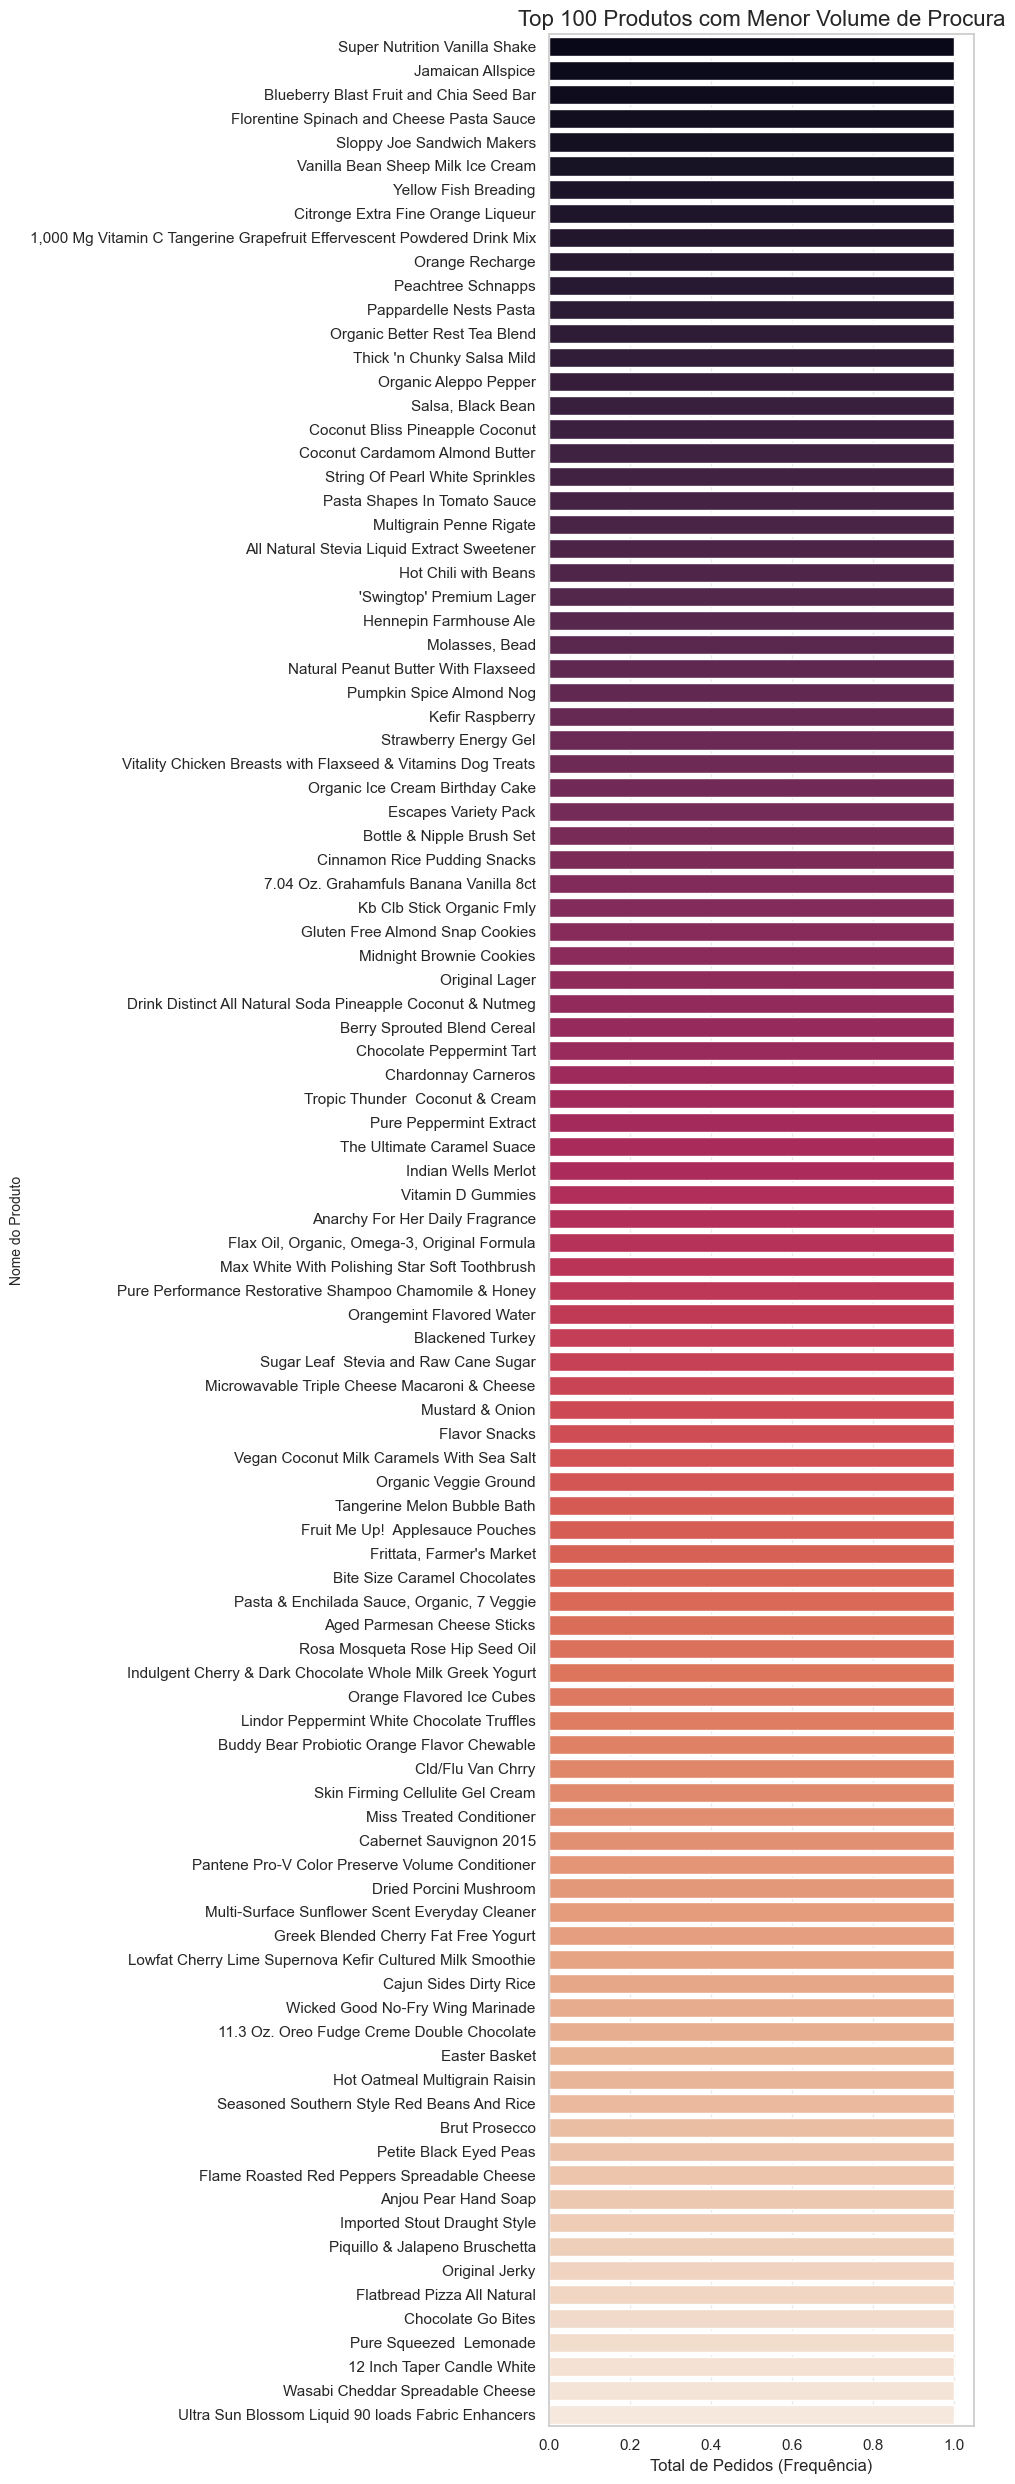

In [ ]:
# 1. Extraindo os 100 produtos com menor frequência
# 'ascending=True' traz os menos vendidos primeiro
bottom_100 = df_super['product_name'].value_counts(ascending=True).head(100)

# 2. Configurando o gráfico
# Aumentamos a altura (25) para que os 100 nomes fiquem legíveis
plt.figure(figsize=(10, 25))

# Criando o gráfico de barras horizontais
sns.barplot(x=bottom_100.values, y=bottom_100.index, palette='rocket')

# 3. Customização
plt.title('Top 100 Produtos com Menor Volume de Procura', fontsize=16)
plt.xlabel('Total de Pedidos (Frequência)', fontsize=12)
plt.ylabel('Nome do Produto', fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.4)

# Ajusta o layout para não cortar os nomes dos produtos
plt.tight_layout()
plt.show()

**add_to_cart_order**

Representa a sequência numérica em que cada produto foi adicionado ao carrinho pelo usuário em um pedido específico. Objetivo: Entender o comportamento de navegação e a prioridade de intenção do consumidor.

Top 20 Produtos que iniciam a jornada de compra:
                   product_name  frequencia
0                        Banana      115521
1        Bag of Organic Bananas       82877
2            Organic Whole Milk       32071
3          Organic Strawberries       28875
4          Organic Hass Avocado       24913
5          Organic Baby Spinach       24412
6               Organic Avocado       23393
7                  Spring Water       17552
8                  Strawberries       17073
9           Organic Raspberries       14950
10   Sparkling Water Grapefruit       14380
11          Organic Half & Half       13073
12                  Large Lemon       12891
13                         Soda       12327
14     Organic Reduced Fat Milk       10242
15                        Limes       10092
16                Hass Avocados        9952
17                  Half & Half        9847
18  Organic Reduced Fat 2% Milk        9644
19                  Raspberries        9320


C:\Users\olive\AppData\Local\Temp\ipykernel_18788\3432958364.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_primeiros_produtos, x='frequencia', y='product_name', palette='crest')


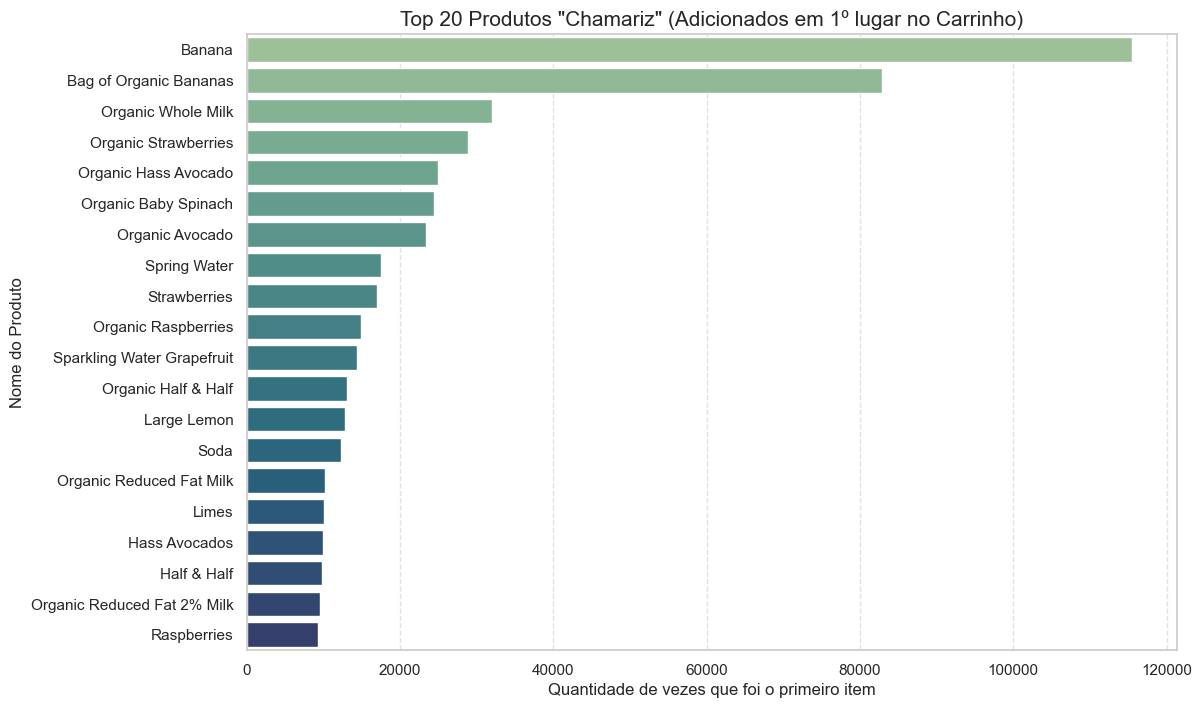

In [ ]:
# 1. Filtrando apenas os itens que foram os primeiros a entrar no carrinho
# Isso isola o produto que "iniciou" cada pedido
df_primeiro_item = df_super[df_super['add_to_cart_order'] == 1]

# 2. Contando a frequência desses produtos (Top 20)
top_primeiros_produtos = df_primeiro_item['product_name'].value_counts().head(20).reset_index()
top_primeiros_produtos.columns = ['product_name', 'frequencia']

# 3. Exibindo os resultados numéricos
print("Top 20 Produtos que iniciam a jornada de compra:")
print(top_primeiros_produtos)

# 4. Criando a visualização para o seu relatório
plt.figure(figsize=(12, 8))
sns.barplot(data=top_primeiros_produtos, x='frequencia', y='product_name', palette='crest')

plt.title('Top 20 Produtos "Chamariz" (Adicionados em 1º lugar no Carrinho)', fontsize=15)
plt.xlabel('Quantidade de vezes que foi o primeiro item', fontsize=12)
plt.ylabel('Nome do Produto', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()

**Quantidade de itens por usuário**

In [17]:
# 1. Calculando o total de itens por pedido
# O valor máximo de 'add_to_cart_order' em cada pedido representa a quantidade de itens nele
df_itens_por_pedido = df_super.groupby('order_id')['add_to_cart_order'].max().reset_index()
df_itens_por_pedido.columns = ['order_id', 'total_itens']
print(df_itens_por_pedido.head())

   order_id  total_itens
0         1            8
1         2            9
2         3            8
3         4           13
4         5           26


Volume de itens: Permite calcular o "Ticket Médio" em volume de itens, identificando se os clientes fazem compras de abastecimento (muitos itens) ou de conveniência (poucos itens).

In [18]:
# 1. Calculando as métricas de centralidade
media = df_itens_por_pedido['total_itens'].mean()
mediana = df_itens_por_pedido['total_itens'].median()
moda = df_itens_por_pedido['total_itens'].mode()[0]

# 2. Exibindo os resultados
print(f"Média de pedidos por cliente: {media:.2f}")
print(f"Mediana (50% dos clientes): {mediana}")
print(f"Moda (Frequência mais comum): {moda}")

Média de pedidos por cliente: 10.11
Mediana (50% dos clientes): 8.0
Moda (Frequência mais comum): 5


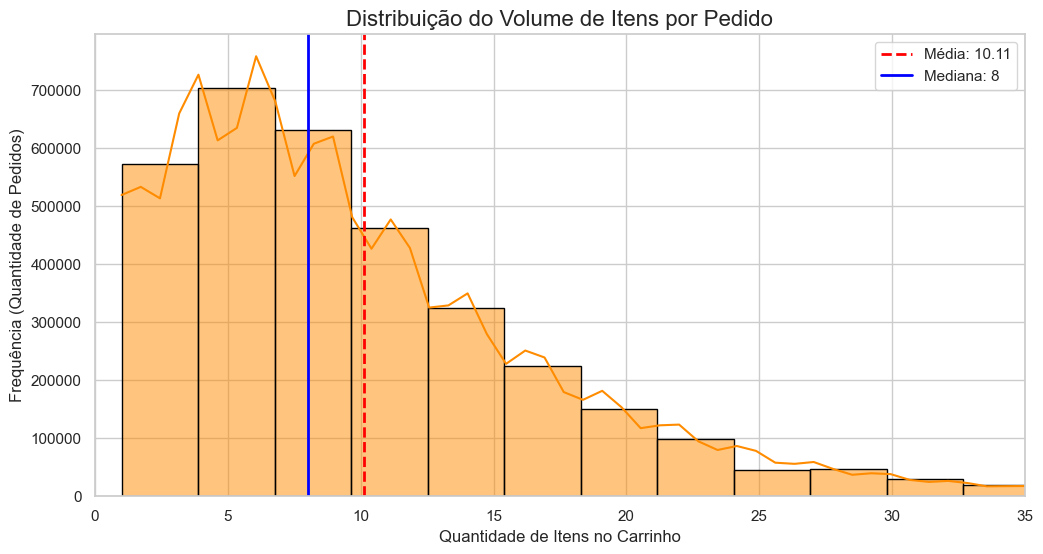

In [21]:

# 1. Configurando o estilo visual
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# 2. Criando o Histograma
# 'total_itens' é a coluna que contém o máximo de add_to_cart_order por pedido
sns.histplot(df_itens_por_pedido['total_itens'], bins=50, kde=True, color='darkorange', edgecolor='black')

# 3. Adicionando as linhas das métricas de centralidade que você definiu
plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f"Média: {media:.2f}")
plt.axvline(mediana, color='blue', linestyle='-', linewidth=2, label=f"Mediana: {mediana:.0f}")

# 4. Customização de títulos e rótulos
plt.title('Distribuição do Volume de Itens por Pedido', fontsize=16)
plt.xlabel('Quantidade de Itens no Carrinho', fontsize=12)
plt.ylabel('Frequência (Quantidade de Pedidos)', fontsize=12)

# Dica: Limitar o eixo X no percentil 99 ajuda a ignorar carrinhos "anormais" e focar na massa de dados
plt.xlim(0, df_itens_por_pedido['total_itens'].quantile(0.99)) 

plt.legend()
plt.show()

**Taxa de recompra**

In [ ]:
# 1. Calculando a taxa média global
taxa_recompra_global = df_super['reordered'].mean()

# 2. Convertendo para porcentagem para facilitar a leitura
porcentagem_recompra = taxa_recompra_global * 100

print(f"Taxa Geral de Recompra: {taxa_recompra_global:.4f}")
print(f"Isso significa que {porcentagem_recompra:.2f}% dos itens vendidos já foram comprados antes pelos mesmos usuários.")

Taxa Geral de Recompra: 0.5901
Isso significa que 59.01% dos itens vendidos já foram comprados antes pelos mesmos usuários.


**Taxa média de recompra por departamento**

C:\Users\olive\AppData\Local\Temp\ipykernel_18788\4240901986.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_recompra_dept.values, y=taxa_recompra_dept.index, palette='viridis')


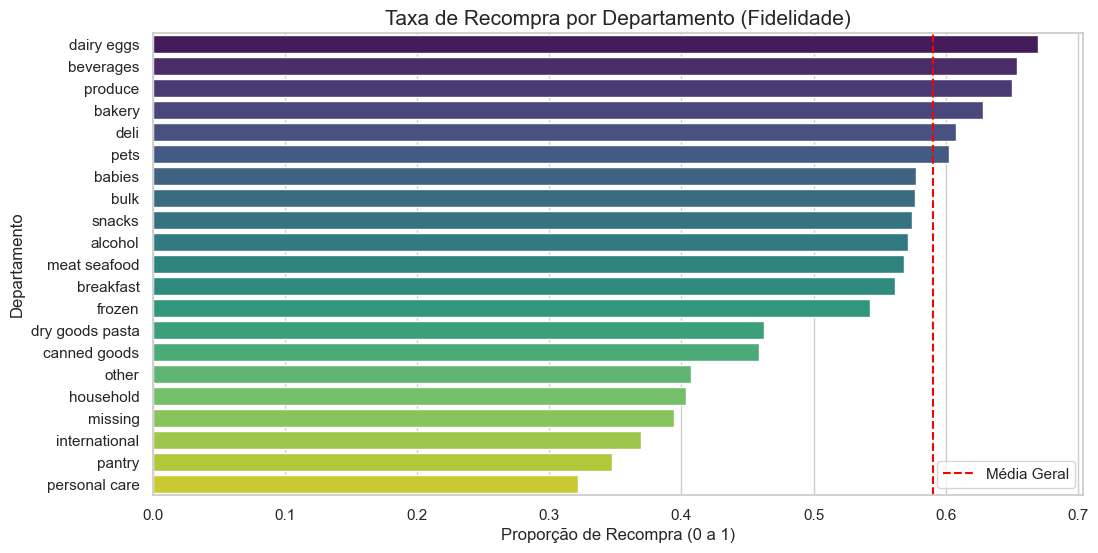

In [ ]:
# 1. Taxa média de recompra por departamento
taxa_recompra_dept = df_super.groupby('department')['reordered'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=taxa_recompra_dept.values, y=taxa_recompra_dept.index, palette='viridis')

plt.title('Taxa de Recompra por Departamento (Fidelidade)', fontsize=15)
plt.xlabel('Proporção de Recompra (0 a 1)', fontsize=12)
plt.ylabel('Departamento', fontsize=12)
plt.axvline(df_super['reordered'].mean(), color='red', linestyle='--', label='Média Geral')
plt.legend()
plt.show()